### PCA PARA CREDITOS BANCARIOS

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
#leer el dataset
df =pd.read_csv('bank.csv')

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
''' En la columna 'Gender' faltan 13 datos
En la columna 'Married' faltan 3 datos
En la columna 'Dependants' faltan 15 datos, y estan en object, hay que pasarlos a int
En la columna 'Self_Employed' faltan 32 datos
En la columna 'ApplicantIncome' hay que pasarlos a float
En la columna 'Credit_History' faltan 50 datos, y estan en float, hay que pasarlos a int
En la columna 'Loan_Amount' faltan 22 datos
En la columna 'Loan_Amount_Term' faltan 14 datos, y estan en object, hay que pasarlos a int
En la columna 'Credit_History' faltan 50 datos, y estan en float, hay que pasarlos a int
'''

" En la columna 'Gender' faltan 13 datos\nEn la columna 'Married' faltan 3 datos\nEn la columna 'Dependants' faltan 15 datos, y estan en object, hay que pasarlos a int\nEn la columna 'Self_Employed' faltan 32 datos\nEn la columna 'ApplicantIncome' hay que pasarlos a float\nEn la columna 'Credit_History' faltan 50 datos, y estan en float, hay que pasarlos a int\nEn la columna 'Loan_Amount' faltan 22 datos\nEn la columna 'Loan_Amount_Term' faltan 14 datos, y estan en object, hay que pasarlos a int\nEn la columna 'Credit_History' faltan 50 datos, y estan en float, hay que pasarlos a int\n"

In [9]:
# Identificar proporción de valores en la columna 'Gender' y rellenar valores faltantes
proporciones = df['Gender'].value_counts(normalize=True)  # Calcular proporciones
print("Proporciones de valores en 'Gender':")
print(proporciones)

# Rellenar valores faltantes siguiendo la proporción
df['Gender'] = df['Gender'].fillna(pd.Series(np.random.choice(proporciones.index,p=proporciones.values,size=len(df))))

Proporciones de valores en 'Gender':
Gender
Male      0.813644
Female    0.186356
Name: proportion, dtype: float64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
proporciones = df['Married'].value_counts(normalize=True)  # Calcular proporciones
print("Proporciones de valores en 'Gender':")
print(proporciones)

# Rellenar valores faltantes siguiendo la proporción
df['Married'] = df['Married'].fillna(pd.Series(np.random.choice(proporciones.index,p=proporciones.values,size=len(df))))

Proporciones de valores en 'Gender':
Married
Yes    0.651391
No     0.348609
Name: proportion, dtype: float64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
# Sustituir los valores '3+' de la columna 'Dependents' por el valor 4
df['Dependents'] = df['Dependents'].replace('3+', 4)

In [14]:
# Encontrar proporción de valores en la columna 'Dependents' y rellenar valores faltantes siguiendo esta proporcion
proporciones = df['Dependents'].value_counts(normalize=True)  # Calcular proporciones
print("Proporciones de valores en 'Dependents':")
print(proporciones) 
# Rellenar valores faltantes siguiendo la proporción
df['Dependents'] = df['Dependents'].fillna(pd.Series(np.random.choice(proporciones.index, 
                                                              p=proporciones.values, 
                                                              size=len(df))))

Proporciones de valores en 'Dependents':
Dependents
0    0.575960
1    0.170284
2    0.168614
4    0.085142
Name: proportion, dtype: float64


In [15]:
# Transformar los valores de la columna 'Dependents' a enteros
df['Dependents'] = df['Dependents'].astype(int)

In [16]:
# Encontrar la proporcion de valores en la columna 'Education' y rellenar valores faltantes con esta proporcion
proporciones = df['Education'].value_counts(normalize=True)  # Calcular proporciones
print("Proporciones de valores en 'Education':")
print(proporciones) 
# Rellenar valores faltantes siguiendo la proporción
df['Education'] = df['Education'].fillna(pd.Series(np.random.choice(proporciones.index, 
                                                              p=proporciones.values, 
                                                              size=len(df))))

Proporciones de valores en 'Education':
Education
Graduate        0.781759
Not Graduate    0.218241
Name: proportion, dtype: float64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [18]:
# Encontrar proporcion de valores en la columna 'Self_Employed' y rellenar valores faltantes siguiendo esta proporcion
proporciones = df['Self_Employed'].value_counts(normalize=True)  # Calcular proporciones
print("Proporciones de valores en 'Self_Employed':")
print(proporciones)
# Rellenar valores faltantes siguiendo la proporción
df['Self_Employed'] = df['Self_Employed'].fillna(pd.Series(np.random.choice(proporciones.index, 
                                                              p=proporciones.values, 
                                                              size=len(df))))

Proporciones de valores en 'Self_Employed':
Self_Employed
No     0.859107
Yes    0.140893
Name: proportion, dtype: float64


In [19]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,4,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [20]:
# Transformar datos de 'CoapplicantIncome' a int
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)

In [21]:
# Encontrar el porcentaje de valores faltantes en la columna 'Loan Amount' print el porcentaje, y rellenar valores faltantes con la media
porcentaje_faltantes = df['LoanAmount'].isnull().mean() * 100
print(f"Porcentaje de valores faltantes en 'LoanAmount': {porcentaje_faltantes:.2f}%")
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean()) 
# Tranformar datos de 'LoanAmount' a int
df['LoanAmount'] = df['LoanAmount'].astype(int)

Porcentaje de valores faltantes en 'LoanAmount': 3.58%


In [22]:
# Encontrar el porcentaje de valores faltantes en la columna 'Loan_Amount_Term', hacer print de este valor, rellenar valores faltantes con la media y transformar datos a int
porcentaje_faltantes = df['Loan_Amount_Term'].isnull().mean() * 100
print(f"Porcentaje de valores faltantes en 'Loan_Amount_Term': {porcentaje_faltantes:.2f}%")
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean()) 
# Transformar datos de 'Loan_Amount_Term' a int
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)

Porcentaje de valores faltantes en 'Loan_Amount_Term': 2.28%


In [23]:
# Encontrar el numero y porcentaje de valores faltantes en la columna 'Credit_History', hacer print de estos valores, hallar la proporcion de los valores y rellenar los datos faltantes con esta proporcion, transformar datos de esta columna a int
num_faltantes = df['Credit_History'].isnull().sum()
porcentaje_faltantes = df['Credit_History'].isnull().mean() * 100
print(f"Número de valores faltantes en 'Credit_History': {num_faltantes}")
print(f"Porcentaje de valores faltantes en 'Credit_History': {porcentaje_faltantes:.2f}%")
proporciones = df['Credit_History'].value_counts(normalize=True)  # Calcular proporciones
print("Proporciones de valores en 'Credit_History':")
print(proporciones)
# Rellenar valores faltantes siguiendo la proporción
df['Credit_History'] = df['Credit_History'].fillna(pd.Series(np.random.choice(proporciones.index, 
                                                              p=proporciones.values,
                                                              size=len(df))))
# Transformar datos de 'Credit_History' a int
df['Credit_History'] = df['Credit_History'].astype('str')

Número de valores faltantes en 'Credit_History': 50
Porcentaje de valores faltantes en 'Credit_History': 8.14%
Proporciones de valores en 'Credit_History':
Credit_History
1.0    0.842199
0.0    0.157801
Name: proportion, dtype: float64


In [24]:
# Todos los valores de la columna 'Loan Amount' son miles, multiplicar cada valor por 1000
df['LoanAmount'] = df['LoanAmount'] * 1000

### Dataset completo y tipos de datos ajustados

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    object
 2   Married            614 non-null    object
 3   Dependents         614 non-null    int64 
 4   Education          614 non-null    object
 5   Self_Employed      614 non-null    object
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int64 
 8   LoanAmount         614 non-null    int64 
 9   Loan_Amount_Term   614 non-null    int64 
 10  Credit_History     614 non-null    object
 11  Property_Area      614 non-null    object
 12  Loan_Status        614 non-null    object
dtypes: int64(5), object(8)
memory usage: 62.5+ KB


In [26]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,146000,360,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128000,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66000,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120000,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141000,360,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267000,360,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95000,360,1.0,Urban,Y
7,LP001014,Male,Yes,4,Graduate,No,3036,2504,158000,360,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526,168000,360,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968,349000,360,1.0,Semiurban,N


## Vamos ahora a convertir todas las variables categoricas a numericas de acuerdo con el siguiente diccionario:
1. Gender: 'Male" = 1, 'Female' = 0
2. Married : 'Yes' = 1, 'No' = 0
3. Education: 'Graduate' = 1, 'Not Graduate' = 0
4. Self_Employed: 'Yes' = 1, 'No' = 0
5. Property_Area: 'Urban' = 1, 'Rural' = 0
6. Loan_Status: 'Y' = 1, 'N' = 0

In [27]:

df['Gender'] = df['Gender'].map({'Male': '1', 'Female': '0'})
df['Married'] = df['Married'].map({'Yes': '1', 'No': '0'})
df['Education'] = df['Education'].map({'Graduate': '1', 'Not Graduate': '0'})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': '1', 'No': '0'})
df['Property_Area'] = df['Property_Area'].map({'Urban': '1', 'Rural': '0'})
df['Loan_Status'] = df['Loan_Status'].map({'Y': '1', 'N': '0'})

In [28]:
df. head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0,146000,360,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508,128000,360,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0,66000,360,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358,120000,360,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0,141000,360,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196,267000,360,1.0,1,1
6,LP001013,1,1,0,0,0,2333,1516,95000,360,1.0,1,1
7,LP001014,1,1,4,1,0,3036,2504,158000,360,0.0,NaN,0
8,LP001018,1,1,2,1,0,4006,1526,168000,360,1.0,1,1
9,LP001020,1,1,1,1,0,12841,10968,349000,360,1.0,NaN,0


In [29]:
# Diccionario inverso para revertir el mapeo
gender_reverse_map = {'1': 'Male', '0': 'Female'}
married_reverse_map = {'1': 'Yes', '0': 'No'}
education_reverse_map = {'1': 'Graduate', '0': 'Not Graduate'}
self_employed_reverse_map = {'1': 'Yes', '0': 'No'}
property_area_reverse_map = {'1': 'Urban', '0': 'Rural'}
loan_status_reverse_map = {'1': 'Y', '0': 'N'}

# Revertir el mapeo
df['Gender'] = df['Gender'].map(gender_reverse_map)
df['Married'] = df['Married'].map(married_reverse_map)
df['Education'] = df['Education'].map(education_reverse_map)
df['Self_Employed'] = df['Self_Employed'].map(self_employed_reverse_map)
df['Property_Area'] = df['Property_Area'].map(property_area_reverse_map)
df['Loan_Status'] = df['Loan_Status'].map(loan_status_reverse_map)

In [30]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,146000,360,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128000,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66000,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120000,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141000,360,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267000,360,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95000,360,1.0,Urban,Y
7,LP001014,Male,Yes,4,Graduate,No,3036,2504,158000,360,0.0,NaN,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526,168000,360,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968,349000,360,1.0,NaN,N


# Por un error en la transformacion de variables categoricas a numericas me salio este error de valores nulos en todas, Les pongo abajo lo que me dijo copilot sobre el error:

Los valores NaN aparecen porque el método .map() asigna NaN a cualquier valor que no esté especificado en el diccionario de mapeo. Esto ocurre si hay valores en las columnas que no coinciden exactamente con las claves del diccionario proporcionado.

Posibles causas:
Valores faltantes (NaN) en las columnas originales: Si las columnas contienen valores faltantes antes de aplicar .map(), estos se mantendrán como NaN después del mapeo.

Errores de formato en los valores: Los valores en las columnas pueden tener espacios adicionales, diferencias en mayúsculas/minúsculas, o caracteres inesperados que no coinciden con las claves del diccionario. Por ejemplo:

' Male' (con un espacio) no coincidirá con 'Male'.
'YES' no coincidirá con 'Yes'.
Valores inesperados: Si hay valores en las columnas que no están contemplados en el diccionario de mapeo, esos valores se convertirán en NaN.

## Lo que hice fue copiar otro dataset llamado 'bank2' para empezar desde el principio

In [31]:
df_2 = pd.read_csv('bank2.csv')

In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [33]:
df_2.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [34]:
# Identificar porcentaje de valores faltantes e imprimir, calcular proporción de valores en la columna 'Gender' y rellenar valores faltantes
porcentaje_faltantes = df_2['Gender'].isnull().mean() * 100
print(f"Porcentaje de valores faltantes en 'Gender': {porcentaje_faltantes:.2f}%")

# Calcular proporciones de valores en la columna 'Gender'
proporciones = df_2['Gender'].value_counts(normalize=True)
print("Proporciones de valores en 'Gender':")
print(proporciones)

# Rellenar valores faltantes siguiendo la proporción
df_2['Gender'] = df_2['Gender'].fillna(pd.Series(np.random.choice(proporciones.index, p=proporciones.values, size=len(df_2))))

# Valores únicos en Gender y su conteo
valores_unicos = df_2['Gender'].value_counts()
print("Valores únicos en Gender y su conteo:")
print(valores_unicos)   

Porcentaje de valores faltantes en 'Gender': 2.12%
Proporciones de valores en 'Gender':
Gender
Male      0.813644
Female    0.186356
Name: proportion, dtype: float64
Valores únicos en Gender y su conteo:
Gender
Male      501
Female    113
Name: count, dtype: int64


In [35]:
# Mostrar cuantos valores unicos hay en la columna 'Gender' y cuales son
valores_unicos = df_2['Gender'].unique()
num_valores_unicos = len(valores_unicos)
print(f"Número de valores únicos en Gender: {num_valores_unicos}")
print("Valores únicos en Gender:")
print(valores_unicos)   

Número de valores únicos en Gender: 2
Valores únicos en Gender:
['Male' 'Female']


In [36]:
# Identificar numero y porcentaje de valores faltantes e imprimir, calcular proporción de valores en la columna 'Married' y rellenar valores faltantes siguiendo esta proporcion
num_faltantes = df_2['Married'].isnull().sum()
porcentaje_faltantes = df_2['Married'].isnull().mean() * 100
print(f"Número de valores faltantes en 'Married': {num_faltantes}")
print(f"Porcentaje de valores faltantes en 'Married': {porcentaje_faltantes:.2f}%")     
# Calcular proporciones de valores en la columna 'Married'
proporciones = df_2['Married'].value_counts(normalize=True)
print("Proporciones de valores en 'Married':")
print(proporciones) 
# Rellenar valores faltantes siguiendo la proporción
df_2['Married'] = df_2['Married'].fillna(pd.Series(np.random.choice(proporciones.index, p=proporciones.values, size=len(df_2))))    
# Mostrar cuantos valores unicos hay en la columna 'Married' y cuales son
valores_unicos = df_2['Married'].unique()
num_valores_unicos = len(valores_unicos)
print(f"Número de valores únicos en Married: {num_valores_unicos}")
print("Valores únicos en Married:")
print(valores_unicos)

Número de valores faltantes en 'Married': 3
Porcentaje de valores faltantes en 'Married': 0.49%
Proporciones de valores en 'Married':
Married
Yes    0.651391
No     0.348609
Name: proportion, dtype: float64
Número de valores únicos en Married: 2
Valores únicos en Married:
['No' 'Yes']


In [37]:
# Sustituir los valores '3+' de la columna 'Dependents' por el valor 4
df_2['Dependents'] = df_2['Dependents'].replace('3+', 4)
# Encontrar el numero y porcentaje de valores faltantes en la columna 'Dependents', hacer print de estos valores, hallar la proporcion de los valores y rellenar los datos faltantes con esta proporcion, transformar datos de esta columna a int
num_faltantes = df_2['Dependents'].isnull().sum()
porcentaje_faltantes = df_2['Dependents'].isnull().mean() * 100
print(f"Número de valores faltantes en 'Dependents': {num_faltantes}")
print(f"Porcentaje de valores faltantes en 'Dependents': {porcentaje_faltantes:.2f}%")
# Calcular proporciones de valores en la columna 'Dependents'
proporciones = df_2['Dependents'].value_counts(normalize=True)
print("Proporciones de valores en 'Dependents':")
print(proporciones)
# Rellenar valores faltantes siguiendo la proporción
df_2['Dependents'] = df_2['Dependents'].fillna(pd.Series(np.random.choice(proporciones.index, 
                                                              p=proporciones.values,
                                                              size=len(df_2))))
# Transformar los valores de la columna 'Dependents' a enteros
df_2['Dependents'] = df_2['Dependents'].astype(int) 

Número de valores faltantes en 'Dependents': 15
Porcentaje de valores faltantes en 'Dependents': 2.44%
Proporciones de valores en 'Dependents':
Dependents
0    0.575960
1    0.170284
2    0.168614
4    0.085142
Name: proportion, dtype: float64


In [38]:
# Mostrar los valores unicos de la columna 'Education' y cuantos hay
valores_unicos = df_2['Education'].unique()
num_valores_unicos = len(valores_unicos)
print(f"Número de valores únicos en Education: {num_valores_unicos}")
print("Valores únicos en Education:")
print(valores_unicos)
# Identificar la proporcion de valores en la columna 'Education'
proporciones = df_2['Education'].value_counts(normalize=True)  # Calcular proporciones
print("Proporciones de valores en 'Education':")
print(proporciones)

Número de valores únicos en Education: 2
Valores únicos en Education:
['Graduate' 'Not Graduate']
Proporciones de valores en 'Education':
Education
Graduate        0.781759
Not Graduate    0.218241
Name: proportion, dtype: float64


In [39]:
# Encontrar el numero y porcentaje de valores faltantes en la columna 'Self_Employed', hacer print de estos valores, hallar la proporcion de los valores y rellenar los datos faltantes con esta proporcion, mostrar los valores unicos de la columna 'Self_Employed' y cuantos hay
num_faltantes = df_2['Self_Employed'].isnull().sum()
porcentaje_faltantes = df_2['Self_Employed'].isnull().mean() * 100
print(f"Número de valores faltantes en 'Self_Employed': {num_faltantes}")
print(f"Porcentaje de valores faltantes en 'Self_Employed': {porcentaje_faltantes:.2f}%")
# Calcular proporciones de valores en la columna 'Self_Employed'
proporciones = df_2['Self_Employed'].value_counts(normalize=True)  # Calcular proporciones
print("Proporciones de valores en 'Self_Employed':")
print(proporciones)
# Rellenar valores faltantes siguiendo la proporción
df_2['Self_Employed'] = df_2['Self_Employed'].fillna(pd.Series(np.random.choice(proporciones.index, 
                                                              p=proporciones.values, 
                                                              size=len(df_2))))
# Mostrar los valores unicos de la columna 'Self_Employed' y cuantos hay
valores_unicos = df_2['Self_Employed'].unique()
num_valores_unicos = len(valores_unicos)
print(f"Número de valores únicos en Self_Employed: {num_valores_unicos}")
print("Valores únicos en Self_Employed:")
print(valores_unicos)

Número de valores faltantes en 'Self_Employed': 32
Porcentaje de valores faltantes en 'Self_Employed': 5.21%
Proporciones de valores en 'Self_Employed':
Self_Employed
No     0.859107
Yes    0.140893
Name: proportion, dtype: float64
Número de valores únicos en Self_Employed: 2
Valores únicos en Self_Employed:
['No' 'Yes']


In [40]:
# Transformar datos de 'CoapplicantIncome' a int
df_2['CoapplicantIncome'] = df_2['CoapplicantIncome'].astype(int)

In [41]:
# Identificar numero y valores faltantes de la columna 'LoanAmount', hacer print de estos valores, hallar la media de los valores y rellenar los datos faltantes con esta proporcion, transformar datos de esta columna a int y multiplicar por 1000
num_faltantes = df_2['LoanAmount'].isnull().sum()
porcentaje_faltantes = df_2['LoanAmount'].isnull().mean() * 100
print(f"Número de valores faltantes en 'LoanAmount': {num_faltantes}")
print(f"Porcentaje de valores faltantes en 'LoanAmount': {porcentaje_faltantes:.2f}%")
# Calcular la media de los valores
media_loan_amount = df_2['LoanAmount'].mean()
print(f"Media de 'LoanAmount': {media_loan_amount:.2f}")
# Rellenar valores faltantes con la media
df_2['LoanAmount'] = df_2['LoanAmount'].fillna(media_loan_amount) 
# Transformar datos de 'LoanAmount' a int
df_2['LoanAmount'] = df_2['LoanAmount'].astype(int) 
# Multiplicar por 1000
df_2['LoanAmount'] = df_2['LoanAmount'] * 1000


Número de valores faltantes en 'LoanAmount': 22
Porcentaje de valores faltantes en 'LoanAmount': 3.58%
Media de 'LoanAmount': 146.41


In [42]:
# Identificar numero y porcentaje de valores faltantes en la columna 'Loan_Amount_Term', hacer print de estos valores, hallar la media de los valores y rellenar los datos faltantes con esta medida, transformar datos de 'Loan_Amount_Term' a int
num_faltantes = df_2['Loan_Amount_Term'].isnull().sum()
porcentaje_faltantes = df_2['Loan_Amount_Term'].isnull().mean() * 100
print(f"Número de valores faltantes en 'Loan_Amount_Term': {num_faltantes}")
print(f"Porcentaje de valores faltantes en 'Loan_Amount_Term': {porcentaje_faltantes:.2f}%")
# Calcular la media de los valores
media_loan_amount_term = df_2['Loan_Amount_Term'].mean()
print(f"Media de 'Loan_Amount_Term': {media_loan_amount_term:.2f}")
# Rellenar valores faltantes con la media
df_2['Loan_Amount_Term'] = df_2['Loan_Amount_Term'].fillna(media_loan_amount_term) 
# Transformar datos de 'Loan_Amount_Term' a int
df_2['Loan_Amount_Term'] = df_2['Loan_Amount_Term'].astype(int)



Número de valores faltantes en 'Loan_Amount_Term': 14
Porcentaje de valores faltantes en 'Loan_Amount_Term': 2.28%
Media de 'Loan_Amount_Term': 342.00


In [43]:
# Identificar el numero y porcentaje de los valores faltantes en la columna 'Credit_History', hacer print de estos valores, hallar la proporcion de los valores y rellenar los datos faltantes con esta proporcion, mostrar los valores unicos de la columna 'Credit_History' y cuantos hay
num_faltantes = df_2['Credit_History'].isnull().sum()
porcentaje_faltantes = df_2['Credit_History'].isnull().mean() * 100
print(f"Número de valores faltantes en 'Credit_History': {num_faltantes}")
print(f"Porcentaje de valores faltantes en 'Credit_History': {porcentaje_faltantes:.2f}%")
proporciones = df_2['Credit_History'].value_counts(normalize=True)  # Calcular proporciones
print("Proporciones de valores en 'Credit_History':")
print(proporciones)
# Rellenar valores faltantes siguiendo la proporción
df_2['Credit_History'] = df_2['Credit_History'].fillna(pd.Series(np.random.choice(proporciones.index, 
                                                              p=proporciones.values,
                                                              size=len(df_2))))
# Mostrar los valores unicos de la columna 'Credit_History' y cuantos hay
valores_unicos = df_2['Credit_History'].unique()
num_valores_unicos = len(valores_unicos)
print(f"Número de valores únicos en Credit_History: {num_valores_unicos}")
print("Valores únicos en Credit_History:")
print(valores_unicos)
# Transformar datos de 'Credit_History' a int
df_2['Credit_History'] = df_2['Credit_History'].astype('int')


Número de valores faltantes en 'Credit_History': 50
Porcentaje de valores faltantes en 'Credit_History': 8.14%
Proporciones de valores en 'Credit_History':
Credit_History
1.0    0.842199
0.0    0.157801
Name: proportion, dtype: float64
Número de valores únicos en Credit_History: 2
Valores únicos en Credit_History:
[1. 0.]


In [44]:
# Valores unicos de la columna 'Property_Area' y cuantos hay
valores_unicos = df_2['Property_Area'].unique()
num_valores_unicos = len(valores_unicos)
print(f"Número de valores únicos en Property_Area: {num_valores_unicos}")
print("Valores únicos en Property_Area:")
print(valores_unicos)
# Valores unicos en la columna 'Loan_Status' y cuantos hay
valores_unicos = df_2['Loan_Status'].unique()      
num_valores_unicos = len(valores_unicos)
print(f"Número de valores únicos en Loan_Status: {num_valores_unicos}")
print("Valores únicos en Loan_Status:")
print(valores_unicos)

Número de valores únicos en Property_Area: 3
Valores únicos en Property_Area:
['Urban' 'Rural' 'Semiurban']
Número de valores únicos en Loan_Status: 2
Valores únicos en Loan_Status:
['Y' 'N']


# DF_2 con datos completos y tipo de datos ajustados

COMMIT AQUI JAJA

In [45]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    object
 2   Married            614 non-null    object
 3   Dependents         614 non-null    int64 
 4   Education          614 non-null    object
 5   Self_Employed      614 non-null    object
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int64 
 8   LoanAmount         614 non-null    int64 
 9   Loan_Amount_Term   614 non-null    int64 
 10  Credit_History     614 non-null    int64 
 11  Property_Area      614 non-null    object
 12  Loan_Status        614 non-null    object
dtypes: int64(6), object(7)
memory usage: 62.5+ KB


In [46]:
df_2.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,146000,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128000,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66000,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120000,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141000,360,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267000,360,1,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95000,360,1,Urban,Y
7,LP001014,Male,Yes,4,Graduate,No,3036,2504,158000,360,0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526,168000,360,1,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968,349000,360,1,Semiurban,N


## Aqui inicio el proceso para PCA
Primer paso: Convertir todas las variables categoricas a numericas:

1. Gender = 'Male':1, 'Female':0
2. Married = 'Yes':1, 'No':0
3. Education = 'Graduate':1, 'Not Graduate':0
4. Self_Employed = 'Yes':1, 'No':0
5. Property_Area = 'Urban':2, 'Semiurban':1, 'Rural':0
6. Loan_Status= 'Y':1, 'N':0

In [47]:
# transformarlos datos de la columna 'Gender' a numericos asignando '1' al valor 'Male' y '0' al valor 'Female'
df_2['Gender'] = df_2['Gender'].map({'Male': 1, 'Female': 0})

In [48]:
df_2['Married'] = df_2['Married'].map({'Yes': 1, 'No': 0})

In [49]:

df_2['Education'] = df_2['Education'].map({'Graduate': 1, 'Not Graduate': 0})

In [50]:
df_2['Self_Employed'] = df_2['Self_Employed'].map({'Yes': 1, 'No': 0})

In [51]:
df_2['Property_Area'] = df_2['Property_Area'].map({'Urban': 2, 'Semiurban' : 1, 'Rural': 0})

In [52]:
df_2['Loan_Status'] = df_2['Loan_Status'].map({'Y': 1, 'N': 0})

# Eliminar columna LoanId

In [53]:
# copiar el dataframe df_2 a df_3
df_3 = df_2.copy()

In [54]:
# Eliminar la columna 'Loan_ID' de df_3
df_3 = df_3.drop(columns=['Loan_ID'])

In [55]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int64
 1   Married            614 non-null    int64
 2   Dependents         614 non-null    int64
 3   Education          614 non-null    int64
 4   Self_Employed      614 non-null    int64
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int64
 11  Loan_Status        614 non-null    int64
dtypes: int64(12)
memory usage: 57.7 KB


In [56]:
df_3.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0,146000,360,1,2,1
1,1,1,1,1,0,4583,1508,128000,360,1,0,0
2,1,1,0,1,1,3000,0,66000,360,1,2,1
3,1,1,0,0,0,2583,2358,120000,360,1,2,1
4,1,0,0,1,0,6000,0,141000,360,1,2,1
5,1,1,2,1,1,5417,4196,267000,360,1,2,1
6,1,1,0,0,0,2333,1516,95000,360,1,2,1
7,1,1,4,1,0,3036,2504,158000,360,0,1,0
8,1,1,2,1,0,4006,1526,168000,360,1,2,1
9,1,1,1,1,0,12841,10968,349000,360,1,1,0


# Pasos para determinar la variable dependiente:
Identifica el objetivo del análisis:

Si estás tratando de predecir un valor o categoría, la variable dependiente será aquella que deseas predecir.
Por ejemplo, en el caso de créditos bancarios, la variable dependiente podría ser 'Loan_Status' (aprobado o rechazado).
Asegúrate de que la variable dependiente esté correctamente codificada:

Si la variable dependiente es categórica, asegúrate de que esté convertida a valores numéricos (como 0 y 1).
En tu caso, ya has mapeado 'Loan_Status' a 1 para 'Y' y 0 para 'N'.
Excluye la variable dependiente del PCA:

PCA se aplica solo a las variables independientes. Por lo tanto, debes excluir la variable dependiente antes de escalar los datos y aplicar PCA.

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Componentes Principales')
plt.show()

# Interpretar la varianza explicada
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

In [57]:
# Definir la variable dependiente
y = df_3['Loan_Status']  # Variable dependiente

In [58]:
# Excluir la variable dependiente de las variables independientes
X = df_3.drop(columns=['Loan_Status'])

In [59]:
# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [61]:

# Varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

Varianza explicada por cada componente principal:
[0.17375273 0.13289629 0.10231329 0.09732353 0.09108187 0.08910481
 0.08246608 0.07411755 0.0716098  0.05373877 0.03159526]


In [62]:
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_scaled)

In [63]:
# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [64]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.790850,0.907481,0.520922,0.698864,0.418649
1,0.314283,-0.369546,0.168565,-1.401648,0.522036
2,-0.197816,-0.040152,-0.058082,1.009710,1.030468
3,-0.522067,-1.359753,0.184968,0.272018,0.142163
4,-0.811039,0.896427,0.511473,0.706133,0.429170


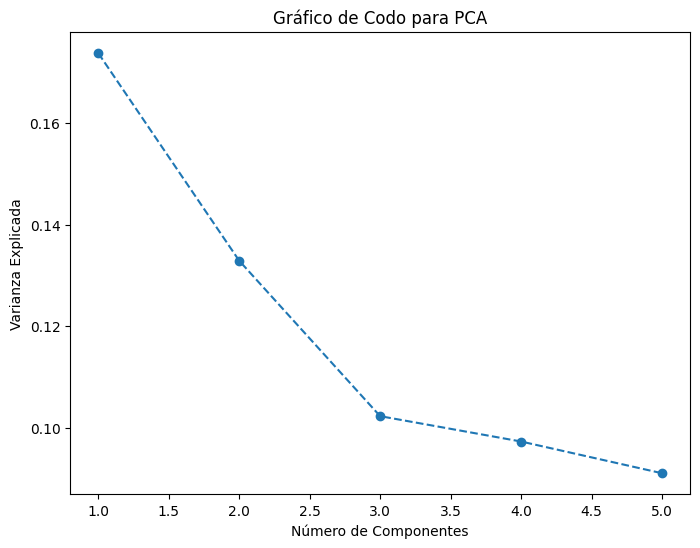

In [65]:
# Graficar el gráfico de codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')
plt.title('Gráfico de Codo para PCA')
plt.show()  

In [66]:
# Calcular la varianza explicada acumulada
varianza_explicada = np.cumsum(pca.explained_variance_ratio_)
print("Varianza explicada acumulada:")
print(varianza_explicada)   

Varianza explicada acumulada:
[0.17375273 0.30664903 0.40896232 0.50628585 0.59736773]


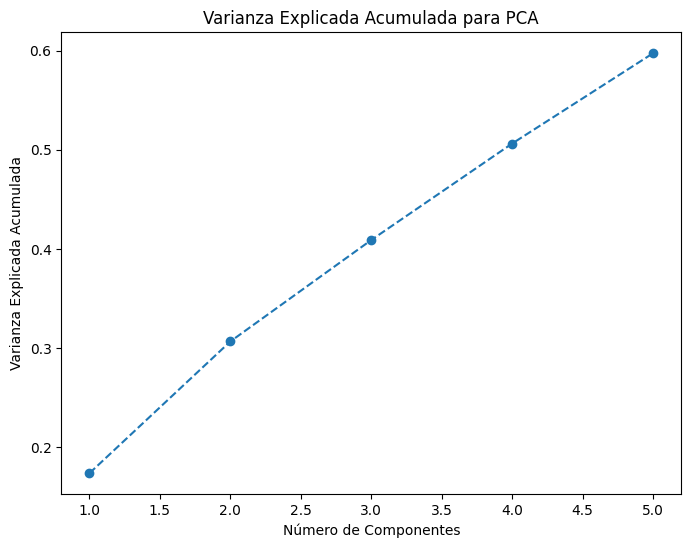

In [67]:
# graficar la varianza acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada para PCA')
plt.show()  

In [68]:
# numero de componentes principales para explicar el 95% de la varianza
num_componentes_95 = np.argmax(varianza_explicada >= 0.95)
print(f"Número de componentes principales necesarios para explicar el 95% de la varianza: {num_componentes_95 + 1}")    

Número de componentes principales necesarios para explicar el 95% de la varianza: 1


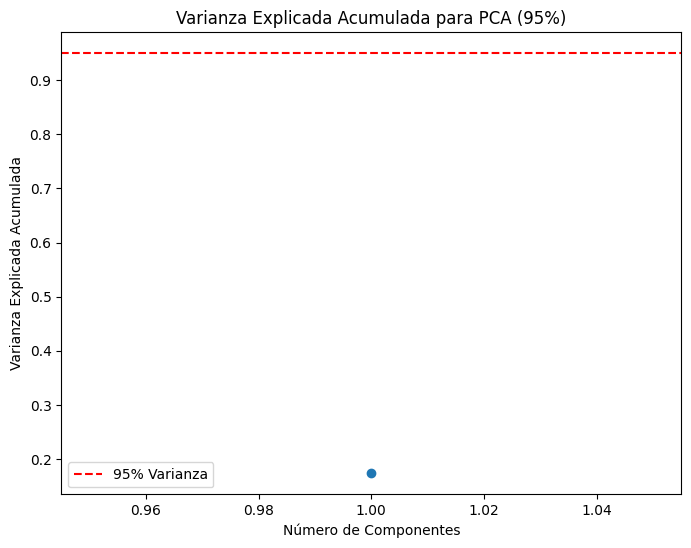

In [69]:
# grafica de la varianza explicada acumulada al 95%
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_componentes_95 + 2), varianza_explicada[:num_componentes_95 + 1], marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada para PCA (95%)')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Varianza')
plt.legend()
plt.show()  

In [70]:
# Agregar la variable dependiente 'y' al DataFrame de componentes principales
pca_df['Loan_Status'] = y

# Mostrar el DataFrame actualizado
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,Loan_Status
0,-0.790850,0.907481,0.520922,0.698864,0.418649,1
1,0.314283,-0.369546,0.168565,-1.401648,0.522036,0
2,-0.197816,-0.040152,-0.058082,1.009710,1.030468,1
3,-0.522067,-1.359753,0.184968,0.272018,0.142163,1
4,-0.811039,0.896427,0.511473,0.706133,0.429170,1


In [71]:
# calcular la correlación entre los componentes principales y la variable dependiente
correlation = pca_df.corr()['Loan_Status'].drop('Loan_Status')
print("Correlación entre los componentes principales y la variable dependiente:")
print(correlation)  

Correlación entre los componentes principales y la variable dependiente:
PC1    0.009301
PC2    0.016028
PC3    0.178000
PC4   -0.052187
PC5    0.500076
Name: Loan_Status, dtype: float64


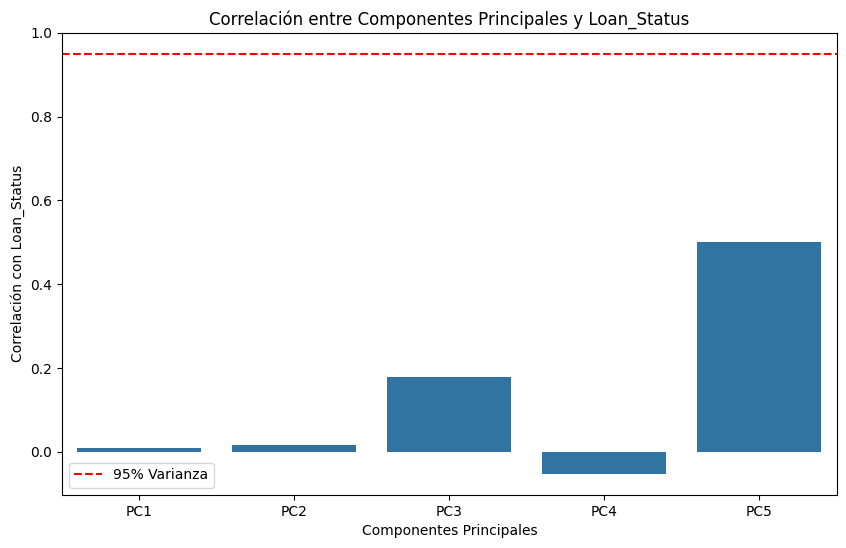

In [72]:
# graficar la correlación entre los componentes principales y la variable dependiente, dibuja linea de 95% de varianza explicada y la linea de varianza explicada acumulada
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Varianza')
plt.xlabel('Componentes Principales')
plt.ylabel('Correlación con Loan_Status')
plt.title('Correlación entre Componentes Principales y Loan_Status')
plt.legend()
plt.show()  


In [73]:
# Muestra que columnas del dataframe se consideraron en pc1, pc2, pc3, pc4 y pc5
componentes = pca.components_
columnas = X.columns
# Crear un DataFrame para visualizar los componentes principales y sus contribuciones
componentes_df = pd.DataFrame(data=componentes, columns=columnas, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])  
print("Contribuciones de las variables a los componentes principales:")
print(componentes_df)  

Contribuciones de las variables a los componentes principales:
       Gender   Married  Dependents  Education  Self_Employed  \
PC1  0.339758  0.406171    0.387874   0.118689       0.160107   
PC2 -0.390883 -0.417534   -0.281622   0.400351       0.163315   
PC3  0.075813  0.068584   -0.164152   0.461591      -0.270798   
PC4 -0.190493 -0.095708    0.036226   0.037016       0.175312   
PC5  0.093207  0.116067    0.020100   0.080232       0.087725   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
PC1         0.461039           0.142232    0.530585         -0.117787   
PC2         0.423290          -0.103327    0.361488          0.278326   
PC3        -0.241755           0.652615    0.058250         -0.012523   
PC4         0.127237          -0.111261   -0.069214         -0.569201   
PC5         0.061287          -0.421413   -0.151222         -0.174182   

     Credit_History  Property_Area  
PC1       -0.022506      -0.027102  
PC2        0.090742      -0.01968

### Creare una copia del df_2 a df_4 Jorge

In [74]:
# crear uan copia del df_2 a df_4
df_4 = df_2.copy()

In [75]:
df_4.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0,146000,360,1,2,1
1,LP001003,1,1,1,1,0,4583,1508,128000,360,1,0,0
2,LP001005,1,1,0,1,1,3000,0,66000,360,1,2,1
3,LP001006,1,1,0,0,0,2583,2358,120000,360,1,2,1
4,LP001008,1,0,0,1,0,6000,0,141000,360,1,2,1


In [76]:
# eliminar la columna 'Loan_ID' de df_4
df_4 = df_4.drop(columns=['Loan_ID'])

In [78]:
df_4.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0,146000,360,1,2,1
1,1,1,1,1,0,4583,1508,128000,360,1,0,0
2,1,1,0,1,1,3000,0,66000,360,1,2,1
3,1,1,0,0,0,2583,2358,120000,360,1,2,1
4,1,0,0,1,0,6000,0,141000,360,1,2,1


In [79]:
# determinar variable dependiente
y = df_4['Loan_Status']  # Variable dependiente

In [80]:
#determinar variables independientes
X = df_4.drop(columns=['Loan_Status'])

In [81]:
# estandarizar datos de las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
#aplicar PCA con dos componentes principales
pca = PCA(n_components=2)


In [83]:
#crear una dataframe con los componentes principales
pca_df = pd.DataFrame(data=pca.fit_transform(X_scaled), columns=['PC1', 'PC2'])
# Agregar la variable dependiente 'y' al DataFrame de componentes principales
pca_df['Loan_Status'] = y

In [84]:
pca_df.head()

,PC1,PC2,Loan_Status
0,-0.790850,0.907481,1
1,0.314283,-0.369546,0
2,-0.197816,-0.040152,1
3,-0.522067,-1.359753,1
4,-0.811039,0.896427,1


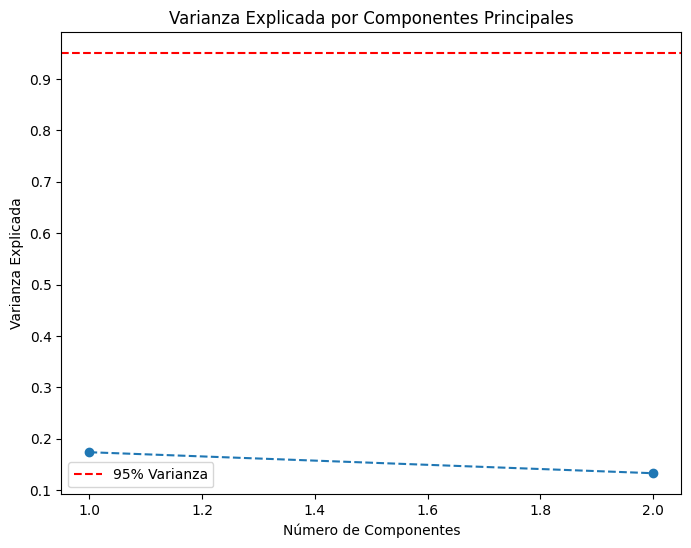

In [85]:
#graficar la varaianza explicada acumulada al 95%
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componentes Principales')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Varianza')
plt.legend()
plt.show()


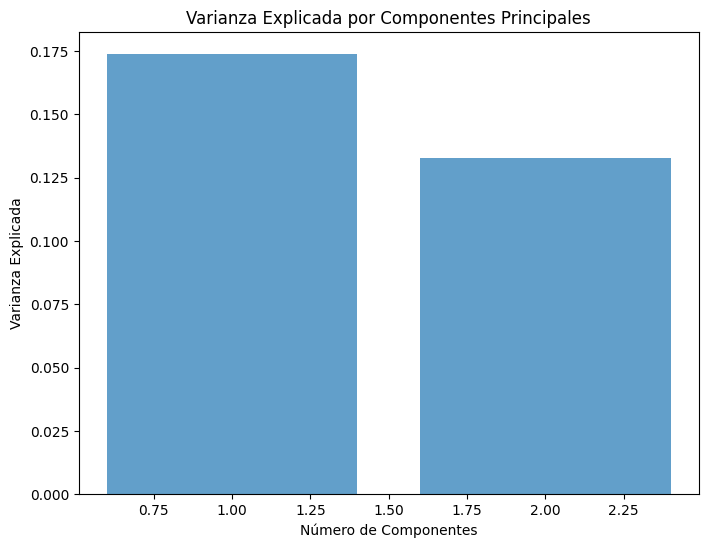

In [86]:
# graficar la varianza por componente
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componentes Principales')
plt.show()

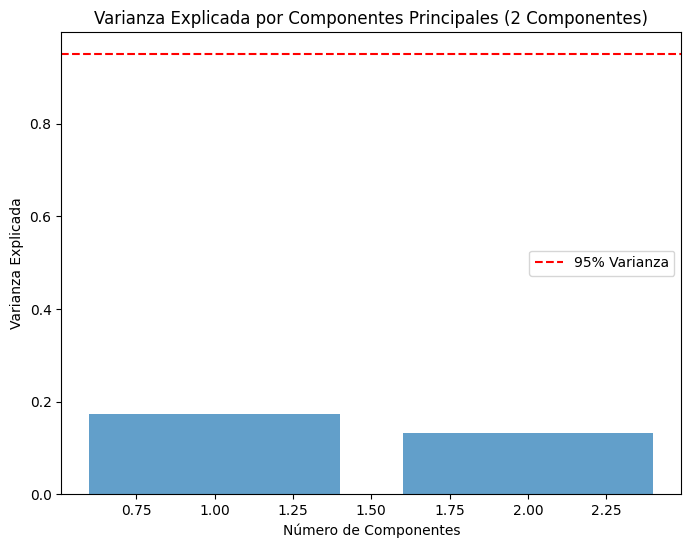

In [88]:
# graficar la varianza por componente principal al 95%
plt.figure(figsize=(8, 6))
plt.bar(range(1, 3), pca.explained_variance_ratio_[:2], alpha=0.7)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componentes Principales (2 Componentes)')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Varianza')
plt.legend()
plt.show()



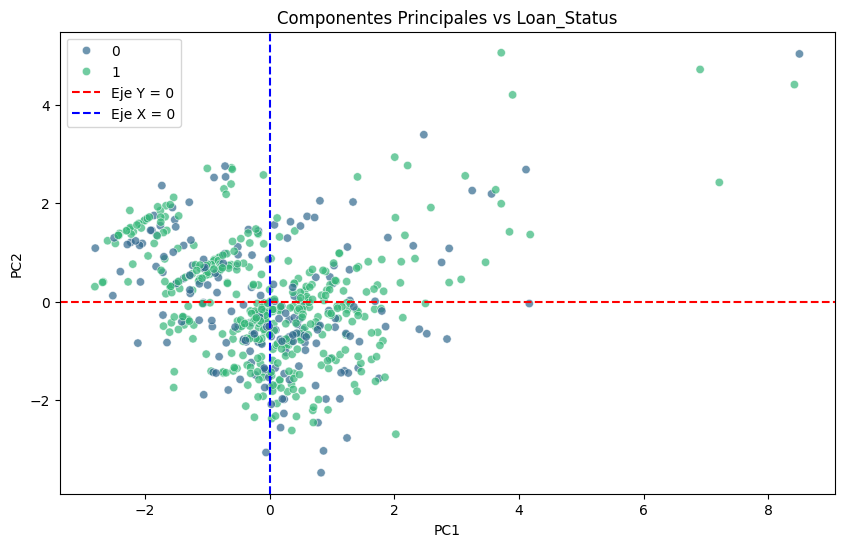

In [89]:
# grafica la correlación entre los componentes principales y la variable dependiente
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Loan_Status', palette='viridis', alpha=0.7)
plt.title('Componentes Principales vs Loan_Status')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(y=0, color='r', linestyle='--', label='Eje Y = 0')
plt.axvline(x=0, color='b', linestyle='--', label='Eje X = 0')
plt.legend()
plt.show()


C:\Users\MASTER\AppData\Local\Temp\ipykernel_5016\1824509050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pca_df.columns[:-1], y=pca_df.corr()['Loan_Status'][:-1], palette='viridis')


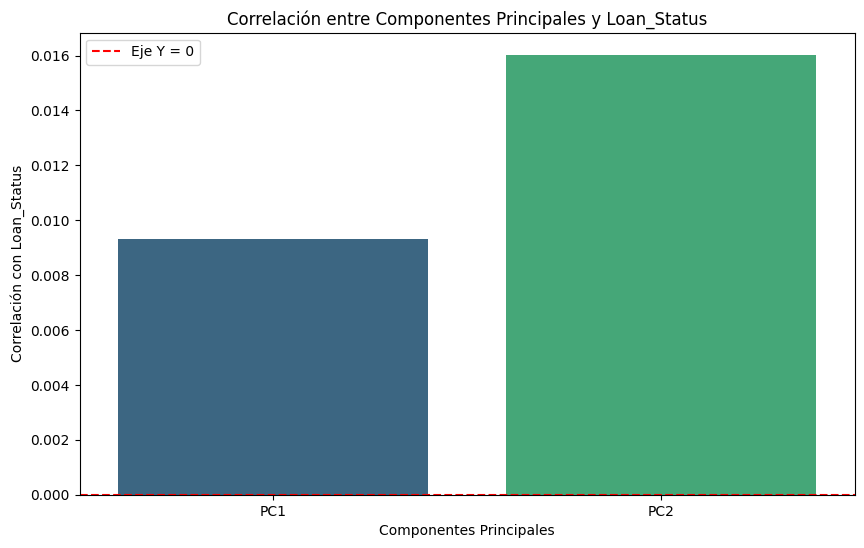

In [90]:
# graficar la correlacion de los componentes principales con la variable dependiente en un grafico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_df.columns[:-1], y=pca_df.corr()['Loan_Status'][:-1], palette='viridis')
plt.title('Correlación entre Componentes Principales y Loan_Status')
plt.xlabel('Componentes Principales')
plt.ylabel('Correlación con Loan_Status')
plt.axhline(y=0, color='r', linestyle='--', label='Eje Y = 0')
plt.legend()
plt.show()


In [94]:
# que atributos se consideraron en cada componente principal
componentes = pca.components_
columnas = X.columns
# Crear un DataFrame para visualizar los componentes principales y sus contribuciones
componentes_df = pd.DataFrame(data=componentes, columns=columnas, index=['PC1', 'PC2'])
print("Contribuciones de las variables a los componentes principales:") 
print(componentes_df)



Contribuciones de las variables a los componentes principales:
       Gender   Married  Dependents  Education  Self_Employed  \
PC1  0.339758  0.406171    0.387874   0.118689       0.160107   
PC2 -0.390883 -0.417534   -0.281622   0.400351       0.163315   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
PC1         0.461039           0.142232    0.530585         -0.117787   
PC2         0.423290          -0.103327    0.361488          0.278326   

     Credit_History  Property_Area  
PC1       -0.022506      -0.027102  
PC2        0.090742      -0.019680  


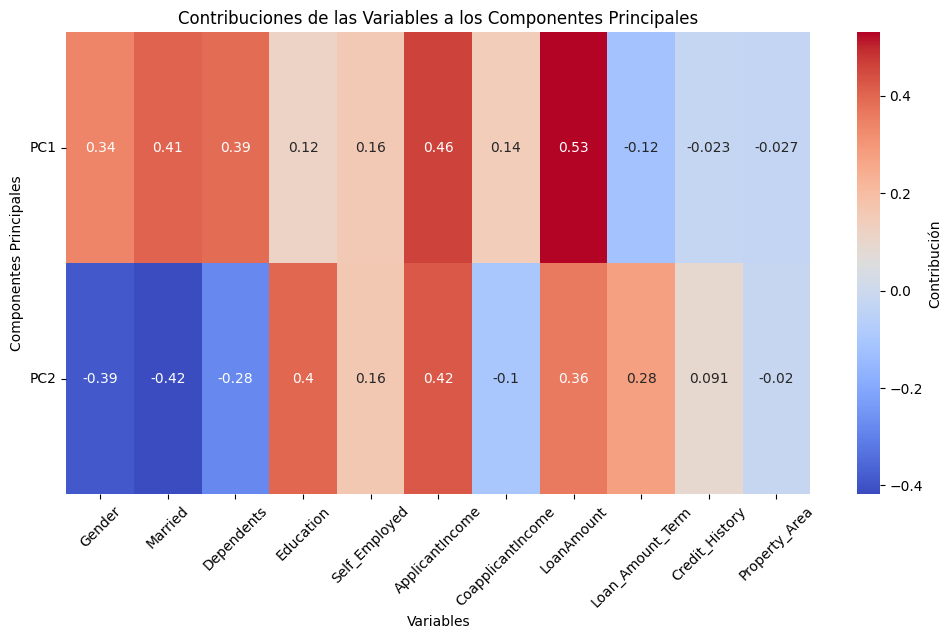

In [95]:
# Visualizar que atributos se consideraron en cada componente principal
plt.figure(figsize=(12, 6)) 
sns.heatmap(componentes_df, annot=True, cmap='coolwarm', cbar_kws={'label': 'Contribución'})
plt.title('Contribuciones de las Variables a los Componentes Principales')      
plt.xlabel('Variables')
plt.ylabel('Componentes Principales')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [96]:
# Que columnas tomo cada componente principal
componentes_df = pd.DataFrame(data=componentes, columns=columnas, index=['PC1', 'PC2'])

In [97]:
componentes_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
PC1,0.339758,0.406171,0.387874,0.118689,0.160107,0.461039,0.142232,0.530585,-0.117787,-0.022506,-0.027102
PC2,-0.390883,-0.417534,-0.281622,0.400351,0.163315,0.423290,-0.103327,0.361488,0.278326,0.090742,-0.019680


In [98]:
# calcula la varianza acumulada de los componentes principales
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
# Imprimir la varianza acumulada
print("Varianza acumulada de los componentes principales:")
print(varianza_acumulada)

Varianza acumulada de los componentes principales:
[0.17375273 0.30664903]


In [99]:
pca.explained_variance_ratio_

array([0.17375273, 0.13289629])